## Project: Credit Card Fraud Detection
#### This is a binary classification project.
#### Performance metrics: higher precision and recall values

#### Dataset and details of problem are available at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Read the data
df = pd.read_csv("data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Time does not seem to convey any information
df.drop("Time", axis=1, inplace= True)

In [5]:
# Target feature is Class 0: valid, 1: fraud transaction
X = df.drop("Class", axis=1)
y = df["Class"]

In [6]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [7]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

Check for class balance

In [8]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
print("% of fraud transactions in dataset:",sum(y==1)*100/y.count())

% of fraud transactions in dataset: 0.1727485630620034


#### Observation: The dataset is highly imbalanced with more valid transactions and fewer fraud transactions

Perform train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
98963,0.911434,-0.095955,-0.417096,1.111959,0.280069,-0.131790,0.552772,-0.067160,-0.559378,0.163169,...,0.129911,0.150115,0.120485,-0.298802,-0.288300,0.720738,-0.263533,-0.028167,0.020453,156.00
211304,-0.039716,0.268617,-0.346237,-1.907338,-0.720542,-1.203625,-0.182630,-0.004372,-2.759709,1.340213,...,-0.190228,-0.201520,-0.157379,0.081304,-0.017392,-0.465494,-0.202923,0.100524,0.053250,5.76
114999,-1.289763,1.136259,1.769767,2.154641,-0.959915,0.475711,-0.612965,1.105978,-0.069911,-0.668770,...,-0.427187,-0.098130,-0.206754,0.035813,0.411275,-0.231770,-0.281629,-0.236777,-0.091708,25.77
194149,0.033422,0.898134,0.302947,-0.597541,0.489160,-1.024356,1.043811,-0.216994,-0.139323,-0.438573,...,-0.002700,-0.246792,-0.497576,0.072200,-0.003485,-0.482998,0.141317,0.253890,0.098277,4.49
120043,-1.597388,1.404173,0.999196,-0.329771,0.758634,1.231370,0.160235,-0.405529,-0.107593,-0.296292,...,-0.377846,0.585335,-0.749559,-0.224106,-1.364172,0.700553,-0.582805,-0.793243,-0.303569,8.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245392,0.105875,0.334567,-0.417847,-1.154287,0.686016,-0.844773,0.512286,-0.235794,-1.375665,-0.146299,...,0.228497,0.035774,0.085622,-0.158934,-0.870134,-0.427783,-0.129599,0.178439,0.200922,15.00
30386,-0.174453,-0.979866,1.035462,-2.492996,-0.879222,-0.073451,-0.456540,0.227367,-2.110813,1.036427,...,-0.302935,-0.079713,-0.142372,0.502409,-0.414440,-1.425625,-0.732468,0.229770,0.233456,87.00
97100,1.123534,-1.065894,-0.299160,-0.777154,-0.287700,0.630797,-0.424579,0.076562,-0.804060,0.551488,...,0.388506,0.148854,0.246003,-0.364996,-1.082415,0.706993,-0.078182,-0.006112,0.009246,153.36
119375,-0.910266,1.198525,1.893286,0.816589,0.274636,-0.634847,0.764717,-0.259198,-0.862949,-0.195432,...,0.090968,0.045679,0.128934,-0.327953,0.433917,0.397455,-0.335894,-0.175101,0.116412,13.66


In [12]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
14139,-0.239864,-2.513227,1.192689,2.867906,-1.686188,1.603264,-0.406110,0.141861,2.377706,-0.622658,...,1.389507,0.269066,-0.077874,-0.811109,-0.340953,0.132394,1.115432,-0.133116,0.137944,723.14
161326,-0.957610,0.651041,2.346134,-0.973166,1.462864,0.690949,1.682458,-1.479584,1.292536,0.988403,...,0.390296,-0.428463,-0.385551,-0.453156,0.028889,0.255979,-0.670513,-1.919677,-1.105079,4.99
4184,1.390052,-0.702506,-0.921658,-1.611584,1.452504,3.276852,-1.162619,0.708837,0.359419,0.279292,...,0.233965,-0.274567,-0.901345,0.076090,0.920321,0.354882,-0.509005,-0.021035,0.016459,47.81
113850,1.317503,0.546911,-0.320409,0.972905,0.368139,-0.868715,0.591719,-0.364993,-0.359073,0.024064,...,-0.090442,-0.024127,0.031705,-0.219964,-0.110803,0.950938,-0.265599,-0.003364,0.006982,0.49
47193,-1.040852,0.179130,1.889407,-1.116881,-0.523130,-0.098664,0.996971,0.115011,-0.523865,-0.919359,...,0.320028,-0.017046,-0.533911,0.196600,-0.015328,0.086703,0.703799,-0.113741,0.054202,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178315,-1.033628,-1.224150,0.248911,-2.497193,0.271443,1.029315,0.822578,0.163793,-1.219486,-0.370923,...,0.859677,0.450490,0.563518,0.358673,-0.766617,0.313351,-0.237246,-0.018989,0.139701,308.00
154399,1.433097,-0.438413,-0.100414,3.778599,0.248035,2.174427,-0.881333,0.718113,0.972499,1.105624,...,-0.266416,0.219682,0.517460,0.155136,-1.578994,-0.667683,0.052821,-0.015661,-0.041649,156.21
261821,2.060543,0.005554,-1.045164,0.411462,-0.077365,-1.199625,0.240691,-0.381548,0.418958,0.049232,...,-0.171313,-0.278886,-0.632010,0.330869,0.068391,-0.272672,0.192590,-0.065629,-0.057962,2.69
62142,-2.761275,-2.644437,2.494172,0.683526,3.172106,-1.843632,-1.733431,0.269227,0.662220,-0.396060,...,0.749414,0.221018,-0.067445,0.228336,-0.490324,0.315572,-0.535939,-0.154260,-0.053454,1.18


In [13]:
y_train

98963     0
211304    0
114999    0
194149    0
120043    0
         ..
245392    0
30386     0
97100     0
119375    0
251123    0
Name: Class, Length: 199364, dtype: int64

Check if similar Class distribution is there after split

In [14]:
print("% of fraud transactions in train set:",sum(y_train==1)*100/y_train.count())
print("% of fraud transactions in test set:",sum(y_test==1)*100/y_test.count())

% of fraud transactions in train set: 0.17505668024317328
% of fraud transactions in test set: 0.16736303734653513


#### Try basic LogisticRegression algorithm to see performance

In [15]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

C:\Users\Padmakar\anaconda3\envs\ML_projects\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Check the performance

Since the data is imblanced, accuracy will not be a good metric.

Confusion matrix and higher precision and recall values are good metrics.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.76      0.65      0.70       143

    accuracy                           1.00     85443
   macro avg       0.88      0.83      0.85     85443
weighted avg       1.00      1.00      1.00     85443



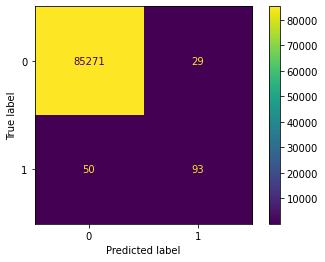

In [16]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has less false positives but more false negatives.

The precision is decent but recall values are low.

This could be due to imbalnced dataset. I don't think even after hyper-parameter tuning we will get any great recall value.

In this use case, it is better to have lower false positives and very low (ideally 0) false negatives.
This is because we do not want to miss any fraudulent case, but are okay to some extent if a valid transaction is flagged as fraud, as some more steps can be done to verify if the transaction is valid or fraud.

#### Ensemble techniques are known to work well for imbalanced dataset
Lets explore with RandomForest

In [17]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85300
           1       0.95      0.77      0.85       143

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



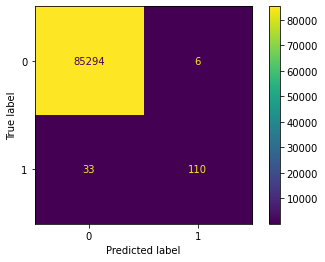

In [18]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has less false positives and less false negatives.

The precision and recall values are pretty decent.

This is a good baseline.

### Try imbalance mitigation techniques

#### Under Sampling

In [19]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [20]:
us = NearMiss(sampling_strategy=0.8) # values closer to 1 lead to perfectly balanced dataset
#0.8 x Majority_class_after_sampling = Minority_class_before_sampling

X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print("Class distribution before:",Counter(y_train))
print("Class distribution after:",Counter(y_train_us))

Class distribution before: Counter({0: 199015, 1: 349})
Class distribution after: Counter({0: 436, 1: 349})


In [21]:
log = LogisticRegression()
log.fit(X_train_us, y_train_us)
y_pred = log.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40     85300
           1       0.00      0.98      0.00       143

    accuracy                           0.25     85443
   macro avg       0.50      0.61      0.20     85443
weighted avg       1.00      0.25      0.40     85443



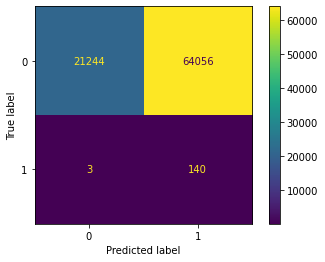

In [22]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()


#### Observation:
Confusion matrix has very less false negatives but a lot more false positives.

The precision is 0 for fraud case, due to too many false positives but recall value for fraud case is good as there are very less false negatives.

This result is not useful either because of too many false positives.

#### Ensemble techniques are known to work well for imbalanced dataset
Lets explore with RandomForest

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train_us, y_train_us)
y_pred = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.01      0.02     85300
           1       0.00      0.99      0.00       143

    accuracy                           0.01     85443
   macro avg       0.50      0.50      0.01     85443
weighted avg       1.00      0.01      0.02     85443



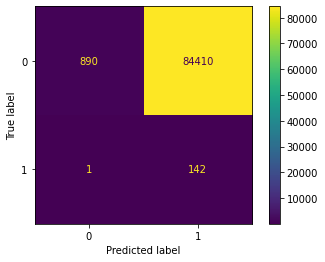

In [24]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm).plot()

#### Observation:
Confusion matrix has very less false negatives but a lot more false positives.


Infact RandomForest performed very bad compared to LogisticRegression now.

The precision is 0 for fraud cases due to too many false positives but recall value for fraud case is good as there are very less false negatives.

This result is not useful.

#### Undersampling is not very helpful
This is possible because my train data after undersampling is very low as compared to my test data.

The model has learnt the data seen in training set very well, but not on test data. Hence it is overfitting.